In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [17]:
image = cv2.imread('2.png',0)

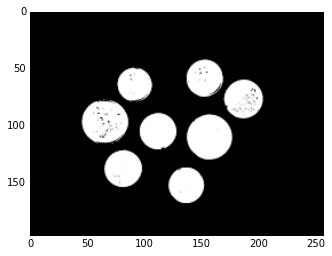

In [19]:
plt.imshow(image,"gray")
plt.show()

In [32]:
kernel = np.ones((4,4),np.uint8)

In [33]:
closed_image = cv2.morphologyEx(image,cv2.MORPH_CLOSE,kernel)

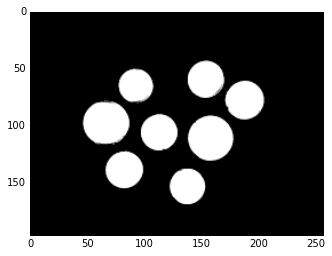

In [34]:
plt.imshow(closed_image,"gray")
plt.show()

In [35]:
closed_image.shape

(196, 257)

In [36]:
output = cv2.connectedComponentsWithStats(closed_image,4,cv2.CV_32S)

In [37]:
help(cv2.connectedComponentsWithStats)

Help on built-in function connectedComponentsWithStats:

connectedComponentsWithStats(...)
    connectedComponentsWithStats(image[, labels[, stats[, centroids[, connectivity[, ltype]]]]]) -> retval, labels, stats, centroids



In [38]:
no_of_labels = output[0]
labelled_image = output[1]
stats = output[2]

In [39]:
no_of_labels


9

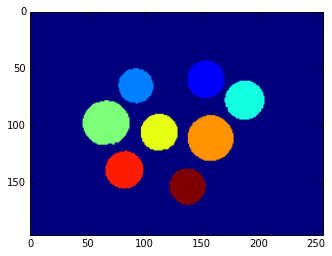

In [40]:
plt.imshow(labelled_image)
plt.show()

In [41]:
stats

array([[    0,     0,   257,   196, 42892],
       [  138,    43,    32,    33,   842],
       [   77,    50,    31,    31,   732],
       [  170,    61,    35,    34,   926],
       [   46,    78,    41,    39,  1253],
       [   97,    90,    32,    32,   824],
       [  138,    91,    40,    40,  1260],
       [   66,   122,    33,    34,   855],
       [  122,   138,    32,    32,   788]], dtype=int32)

In [43]:
area_array = stats[:,-1]
print(area_array)

[42892   842   732   926  1253   824  1260   855   788]


In [44]:
# get the area of the maximum circle
max_area = 0
max_area_label = 1
for i in range(2,no_of_labels):
    if(max_area < area_array[i]):
        max_area = area_array[i]
        max_area_label = i

In [45]:
max_area_label

6

In [46]:
#Output only max area circle
output_image = np.zeros(labelled_image.shape)
output_image[labelled_image == max_area_label] = 255

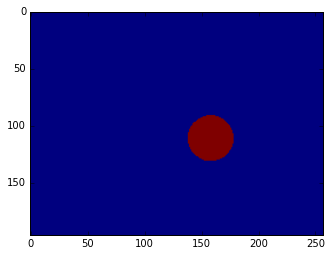

In [47]:
plt.imshow(output_image)
plt.show()